In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

79.10677820632222 -9.196772988451414
-41.76218653163273 -98.51801358855317
1.8707060544146117 -28.572979988404427
31.28149056595943 42.44230956385729
11.266522748847919 -157.9243736764305
73.68136245237432 102.3002754902202
-61.953434067575216 156.14519703483774
-17.84150613824727 -23.352087134712036
-60.08345833417936 -97.20602754767651
-62.7585381068842 -172.1202444169204
-47.78178182610637 71.34494197321254
-14.92960878741043 121.98036552375879
19.521243617942886 175.295174491581
3.0602202756986827 -48.30517232976703
14.044680336513863 -93.04510883243759
-30.150773721268834 -64.53866009498434
-83.94518153439049 -81.38139592114948
-79.60390004371936 48.1553836341746
-72.60258927492569 155.12559484097915
49.377374134201034 -149.92579980743622
63.65496367780946 -60.35133638034115
-8.12949365481451 -108.74827020687479
58.537184057534716 -51.725564616404284
-60.63588938965047 81.48050224801881
-40.48685065024517 -115.7695278937392
83.5099408033067 9.363541203135895
-25.573684951088893 49

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url_2 = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url_2)

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("------------------")

# Create counters.
record_count = 1
set_count = 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=15447705ccba9995db1c8cdf7669750e
Beginning Data Retrieval     
------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url_2 + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | touros
Processing Record 4 of Set 1 | hit
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | amapa
Processing Record 15 of Set 1 | puerto madero
Processing Record 16 of Set 1 | villa carlos paz
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | paamiut
Processing Record 24 of Set 1 | busselton
Processing Record 25 o

Processing Record 37 of Set 4 | sechura
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | mercedes
Processing Record 40 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 41 of Set 4 | paracuru
Processing Record 42 of Set 4 | toftir
City not found. Skipping...
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | pasighat
Processing Record 45 of Set 4 | liling
Processing Record 46 of Set 4 | noboribetsu
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | hermanus
Processing Record 50 of Set 4 | udachnyy
Processing Record 1 of Set 5 | dzerzhinsk
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | honiara
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5

Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | leninskoye
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | kirksville
Processing Record 33 of Set 8 | gadsden
Processing Record 34 of Set 8 | mamallapuram
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | ola
Processing Record 37 of Set 8 | nassau
Processing Record 38 of Set 8 | shankargarh
Processing Record 39 of Set 8 | huron
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | maragogi
Processing Record 42 of Set 8 | aberystwyth
Processing Record 43 of Set 8 | adrar
Processing Record 44 of Set 8 | urumqi
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | nalobikha
Processing Record 47 of Set 8 | sagua la grande
Processing Record 48 of Set 8 | sangar
Processing Record 49 of Set 8 | saint-malo
Processing Record 50 of Set 8 | jiuquan
Processing Record 1 of Set 9 | hermosillo
Processing Record 2 o

Processing Record 14 of Set 12 | waipawa
Processing Record 15 of Set 12 | sisimiut
Processing Record 16 of Set 12 | burgeo
Processing Record 17 of Set 12 | glendive
Processing Record 18 of Set 12 | vao
Processing Record 19 of Set 12 | galway
Processing Record 20 of Set 12 | prince albert
Processing Record 21 of Set 12 | tessalit
Processing Record 22 of Set 12 | novolvovsk
City not found. Skipping...
Processing Record 23 of Set 12 | hamina
Processing Record 24 of Set 12 | atsiki
City not found. Skipping...
Processing Record 25 of Set 12 | yendi
Processing Record 26 of Set 12 | novoagansk
Processing Record 27 of Set 12 | roblin
Processing Record 28 of Set 12 | lakes entrance
Processing Record 29 of Set 12 | kathu
Processing Record 30 of Set 12 | ust-tsilma
Processing Record 31 of Set 12 | adwa
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | boves
Processing Record 34 of Set 12 | parainen
Processing Record 35 of Set 12 | tommot
Processing Record 36 of Set 12 | krist

In [10]:
len(city_data)

542

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Husavik,66.0449,-17.3389,46.04,87,100,7.00,IS,2022-07-20 20:25:13
1,Ancud,-41.8697,-73.8203,41.23,64,87,14.81,CL,2022-07-20 20:25:40
2,Touros,-5.1989,-35.4608,77.16,78,98,13.73,BR,2022-07-20 20:27:55
3,Hit,33.6416,42.8251,99.01,14,0,11.18,IQ,2022-07-20 20:27:56
4,Hilo,19.7297,-155.0900,83.28,90,100,6.91,US,2022-07-20 20:24:59


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df2 = city_data_df[new_column_order]
city_data_df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Husavik,IS,2022-07-20 20:25:13,66.0449,-17.3389,46.04,87,100,7.00
1,Ancud,CL,2022-07-20 20:25:40,-41.8697,-73.8203,41.23,64,87,14.81
2,Touros,BR,2022-07-20 20:27:55,-5.1989,-35.4608,77.16,78,98,13.73
3,Hit,IQ,2022-07-20 20:27:56,33.6416,42.8251,99.01,14,0,11.18
4,Hilo,US,2022-07-20 20:24:59,19.7297,-155.0900,83.28,90,100,6.91
5,Khatanga,RU,2022-07-20 20:26:40,71.9667,102.5000,45.64,65,100,21.32
6,Tuatapere,NZ,2022-07-20 20:27:56,-46.1333,167.6833,42.49,83,100,1.97
7,Georgetown,MY,2022-07-20 20:25:49,5.4112,100.3354,80.89,92,20,4.61
8,Punta Arenas,CL,2022-07-20 20:23:16,-53.1500,-70.9167,35.62,80,75,24.16
9,Vaini,TO,2022-07-20 20:27:57,-21.2000,-175.2000,73.56,88,20,8.05


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

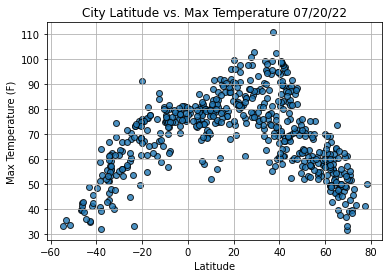

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

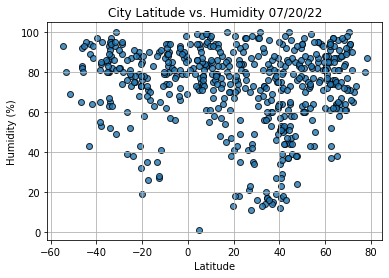

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

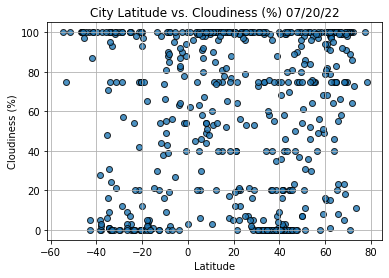

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

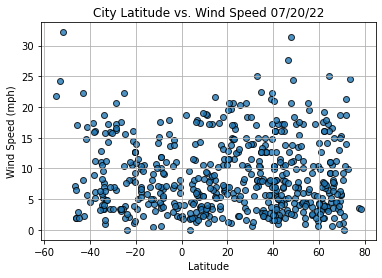

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()